## Travel Demand
##### <div style="text-align: justify"> Travel demand can be defined as a mathematical relationship between demand flow and its characteristics on the one hand, and given activity and transportation supply systems and their characteristics, on the other. Followings are the main characteristics of travel demand: </div>

* Genaration (trip production rate or frequency choice)
* Distribution (destination choice)
* Modal split (mode choice)
* Assignment (route choice)

## Gravity model
##### <div style="text-align: justify"> The gravity model (a well-known distribution model) is much like Newton's theory of gravity. This model assumes that the trips produced at an origin and attracted to a destination are directly proportional to the total trip productions at the origin and the total attractions at the destination. The calibrating term or "friction factor" (F) represents the reluctance or impedance of persons to make trips of various duration or distances.</div>

In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
import seaborn as sns
import random
import pandas as pd

### 1. Empirical demand data

* Like Bike sharing dataset of NYC.
https://www.kaggle.com/datasets/akkithetechie/new-york-city-bike-share-dataset?select=NYC-BikeShare-2015-2017-combined.csv

In [2]:
df = pd.read_csv('Amsterdam_requests_new.csv')
df.treq = df.apply(lambda row: pd.Timestamp(row.treq), axis=1)
df

,Unnamed: 0,origin,destination,treq,tarr,ttrav,dist,orig_geo,dest_geo,origin_y,origin_x,destination_y,destination_x,haver_dist
0,0,46343829,5777055555,1900-01-01 19:36:00,1900-01-01 20:00:00,0 days 00:24:00.000000000,2696,POINT (4.8889728 52.3618803),POINT (4.8947789 52.3796757),52.361880,4.888973,52.379676,4.894779,2017.639692
1,1,1525015196,2020569141,1900-01-01 18:29:00,1900-01-01 18:53:00,0 days 00:24:00.000000000,3489,POINT (4.9062867 52.3591398),POINT (4.8847412 52.3739514),52.359140,4.906287,52.373951,4.884741,2202.841087
2,2,46484989,6219354473,1900-01-01 13:24:00,1900-01-01 13:48:00,0 days 00:24:00.000000000,5152,POINT (4.8663224 52.3934468),POINT (4.8811843 52.4257211),52.393447,4.866322,52.425721,4.881184,3727.642905
3,4,46445391,1732413559,1900-01-01 14:59:00,1900-01-01 15:28:00,0 days 00:29:00.000000000,4787,POINT (4.8225358 52.3841401),POINT (4.7929588 52.3574315),52.384140,4.822536,52.357431,4.792959,3584.982166
4,5,442534817,46453553,1900-01-01 11:30:00,1900-01-01 12:16:00,0 days 00:46:00.000000000,2440,POINT (4.8042997 52.3903223),POINT (4.8330381 52.3859123),52.390322,4.804300,52.385912,4.833038,2010.989249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93291,100316,2101786750,520376452,1900-01-01 13:20:00,1900-01-01 16:01:00,0 days 02:41:00.000000000,3198,POINT (4.8395385 52.345118),POINT (4.8273257 52.3651666),52.345118,4.839538,52.365167,4.827326,2378.601141
93292,100317,30154649,46282361,1900-01-01 19:36:00,1900-01-01 20:00:00,0 days 00:24:00.000000000,5797,POINT (4.9420068 52.3601681),POINT (4.869708 52.3477848),52.360168,4.942007,52.347785,4.869708,5099.651861
93293,100318,46419807,46330781,1900-01-01 23:02:00,1900-01-01 23:25:00,0 days 00:23:00.000000000,3290,POINT (4.8942334 52.3786703),POINT (4.8928959 52.358953),52.378670,4.894233,52.358953,4.892896,2194.346460
93294,100319,46244835,46519996,1900-01-01 10:06:00,1900-01-01 10:32:00,0 days 00:26:00.000000000,9877,POINT (4.9388043 52.3393751),POINT (4.9167433 52.4049547),52.339375,4.938804,52.404955,4.916743,7444.338424


### Spatial distribution

In [3]:
t0 = pd.Timestamp('1900-01-01 08:00:00')
t1 = pd.Timestamp('1900-01-01 09:00:00')

df = df.loc[(t0<df.treq) & (df.treq<t1) & (5000<df.dist)]

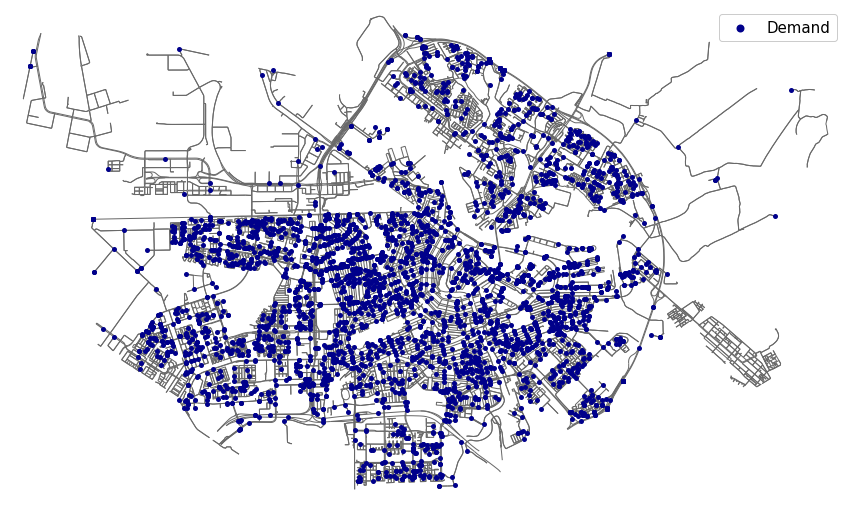

In [4]:
path = 'Amsterdam.graphml'
G = ox.load_graphml(path)

ox.plot_graph(G, figsize=(15, 15), edge_linewidth=1, show=False, close=False, node_size=0, 
              bgcolor='white', edge_color='dimgrey')

scat = plt.scatter(x=df.origin_x, y=df.origin_y, c='darkblue',linewidths=2, label='Demand', marker='.', alpha=1)

plt.legend(facecolor='white',framealpha=1, loc=1, fontsize= 15, markerscale=2)

### Temporal distribution

(array([3.000e+00, 0.000e+00, 2.000e+00, 5.330e+02, 1.962e+03, 5.264e+03,
        6.725e+03, 4.212e+03, 5.377e+03, 3.456e+03, 5.476e+03, 4.419e+03,
        6.445e+03, 5.197e+03, 6.454e+03, 6.662e+03, 7.828e+03, 9.614e+03,
        4.056e+03, 3.192e+03, 1.677e+03, 3.534e+03, 7.950e+02, 4.130e+02]),
 array([-25566.88819444, -25566.85138889, -25566.81458333, -25566.77777778,
        -25566.74097222, -25566.70416667, -25566.66736111, -25566.63055556,
        -25566.59375   , -25566.55694444, -25566.52013889, -25566.48333333,
        -25566.44652778, -25566.40972222, -25566.37291667, -25566.33611111,
        -25566.29930556, -25566.2625    , -25566.22569444, -25566.18888889,
        -25566.15208333, -25566.11527778, -25566.07847222, -25566.04166667,
        -25566.00486111]),
 <BarContainer object of 24 artists>)

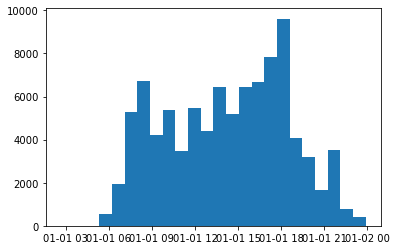

In [5]:
df = pd.read_csv('Amsterdam_requests_new.csv')
df.treq = df.apply(lambda row: pd.Timestamp(row.treq), axis=1)
plt.hist(df.treq, bins=24)

### Sample a trip from the Amsterdam data and show its origin, destination , and route on the graph.

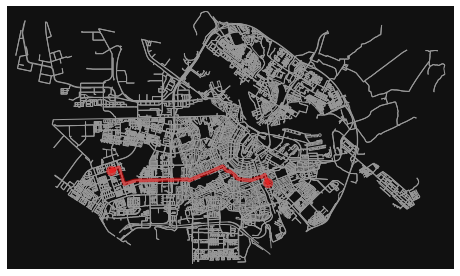

In [6]:
trip = df.sample(1)
o = ox.nearest_nodes(G, trip.origin_x, trip.origin_y)
d = ox.nearest_nodes(G, trip.destination_x, trip.destination_y)

route = nx.shortest_path(G, o[0], d[0], weight='length')
ax = ox.plot_graph_route(G, route, node_size=0)

### 2. H3 package: A grid system for efficiently analyzing the geographic information.
* https://www.uber.com/en-PL/blog/h3/

In [7]:
import h3
import folium
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import random
import pandas as pd
import numpy as np
import seaborn as sns
import json
from geojson.feature import Feature, FeatureCollection
from osmnx.distance import get_nearest_node

In [8]:
ox.distance

<module 'osmnx.distance' from 'C:\\Users\\farno\\anaconda3\\lib\\site-packages\\osmnx\\distance.py'>

In [9]:
# H3 assigns an specific address to each point on the map. To do so, H3 needs longitude and
# latitude of each point. Each address specifies a hexagon.

lat = 52.3701725
lng = 4.8883961
zoning_level = 3
h3_address = h3.geo_to_h3(lat, lng, zoning_level)
h3_address

'831969fffffffff'

In [10]:
# Here are some visualization functions.

def visualize_hexagons(hexagons, color="red", w=1, folium_map=None):
    """
    hexagons is a list of hexcluster. Each hexcluster is a list of hexagons. 
    eg. [[hex1, hex2], [hex3, hex4]]
    """
    polylines = []
    lat = []
    lng = []
    for hex in hexagons:
        polygons = h3.h3_set_to_multi_polygon([hex], geo_json=False)
        # flatten polygons into loops.
        outlines = [loop for polygon in polygons for loop in polygon]
        polyline = [outline + [outline[0]] for outline in outlines][0]
        lat.extend(map(lambda v:v[0],polyline))
        lng.extend(map(lambda v:v[1],polyline))
        polylines.append(polyline)
    
    if folium_map is None:
        m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    else:
        m = folium_map
    for polyline in polylines:
        my_PolyLine=folium.PolyLine(locations=polyline,weight=w,color=color,fill= True)
        m.add_child(my_PolyLine)
    return m
    

def visualize_polygon(polyline, color):
    polyline.append(polyline[0])
    lat = [p[0] for p in polyline]
    lng = [p[1] for p in polyline]
    m = folium.Map(location=[sum(lat)/len(lat), sum(lng)/len(lng)], zoom_start=13, tiles='cartodbpositron')
    my_PolyLine=folium.PolyLine(locations=polyline,weight=8,color=color)
    m.add_child(my_PolyLine)
    return m

In [11]:
# visualize a hexagon with its address
hexagons = [h3_address]
visualize_hexagons(hexagons, color="red", w=1, folium_map=None)

In [11]:
# You can do the reverse and get the longitude and latitude for each hexagon which are 
# indicating the center of hexagon.

hex_center_coordinates = h3.h3_to_geo(h3_address)
hex_center_coordinates

(52.37162230263845, 4.884865432622304)

In [12]:
# You can apply the h3 on the whole city. But first you need to assign a hexagon for each node.

df = pd.DataFrame(columns=['node_address', 'latitude', 'longitude', 'h3_address'])
df.node_address = list(G.nodes)
df.latitude = df.apply(lambda row: G.nodes[row.node_address]['y'], axis=1)
df.longitude = df.apply(lambda row: G.nodes[row.node_address]['x'], axis=1)
zoning_level = 7
df.h3_address = df.apply(lambda row: h3.geo_to_h3(row.latitude, row.longitude, zoning_level), axis=1)

df

,node_address,latitude,longitude,h3_address
0,6316199,52.370173,4.888396,871969c9bffffff
1,25596477,52.367000,4.906097,871969526ffffff
2,25658579,52.364544,4.930438,871969524ffffff
3,26203121,52.364162,4.865235,871969534ffffff
4,26206556,52.363425,4.872947,871969535ffffff
...,...,...,...,...
12284,9665415492,52.324816,4.886144,871969504ffffff
12285,9665415493,52.324801,4.887807,871969504ffffff
12286,9665415494,52.324843,4.887633,871969504ffffff
12287,9665464014,52.373632,4.812587,871969536ffffff


In [13]:
# Some hexagons are repeated because more than one node is assigned to them. So, we just take
# the unique values.

hexagons = df.h3_address.unique()
# print(hexagons)
visualize_hexagons(hexagons, color="blue", w=1, folium_map=None)

In [14]:
# Now let's assign a value for each hexagon and visualize it.
# Here simply we want to visualize the number of graph nodes in the hexagons.
# First we need to know the number of nodes in each hexagon. So, we make a DataFrame.

df1 = pd.DataFrame(columns=['hex_address', 'number_of_nodes'])
df1.hex_address = df.h3_address.unique()
df1.number_of_nodes = df1.apply(lambda row: df.h3_address.value_counts()[row.hex_address], axis=1)

df1

,hex_address,number_of_nodes
0,871969c9bffffff,578
1,871969526ffffff,601
2,871969524ffffff,370
3,871969534ffffff,631
4,871969535ffffff,682
5,871969530ffffff,590
6,871969525ffffff,108
7,871969c8affffff,279
8,871968269ffffff,461
9,871969533ffffff,55


In [45]:
# Now we can visualize it with h3 using the following function.

def h3_visualization(df, hex_col, value_col):
    df['lat'] = df[hex_col].apply(lambda x: h3.h3_to_geo(x)[0])
    df['lng'] = df[hex_col].apply(lambda x: h3.h3_to_geo(x)[1])
    # df.set_index('hex_address', inplace=True)
    df['geom'] = df.apply(lambda x: {"type": "Polygon","coordinates": [h3.h3_to_geo_boundary(h = x[hex_col], geo_json = True)]}, axis = 1)
    list_features = []
    for i, row in df.iterrows():
            feature = Feature(geometry = row["geom"],
                              id = row[hex_col],
                              properties = {"resolution": 9})
            list_features.append(feature)
    list_features 

    feat_collection = FeatureCollection(list_features)
    geojson_hexes = json.dumps(feat_collection)
    geojson_hexes

    cx, cy = G.nodes[centeral_node]['x'], G.nodes[centeral_node]['y']
    CENTER = [cy, cx]

    tile = 'cartodbpositron'
    base_map = folium.Map(location=CENTER, zoom_start=11,tiles=tile, zoomControl =  False)
    # bins = list(np.arange(0,701,100))
    # bins = list(np.arange(0,9001,1000))
    bins = list(np.arange(0,201,50))
    # bins = [0,100,200,300,400,500, 600]

    # for colors see https://user-images.githubusercontent.com/17128994/115975254-c2031e00-a56b-11eb-8025-d82d36bfda1d.png
    color_set = ["Spectral", "RdYlGn", "PuBu", "Accent", "OrRd", "Set1", "Set2", "Set3", "BuPu", "Dark2", "RdBu", "Oranges", "BuGn", "PiYG", "YlOrBr", "YlGn", "Pastel2", "RdPu", "Greens", "PRGn", "YlGnBu", "RdYlBu", "Paired", "BrBG", "Purples", "Reds", "Pastel1", "GnBu", "Greys", "RdGy", "YlOrRd", "PuOr", "PuRd", "Blues", "PuBuGn"]
    m = folium.Choropleth(geo_data = geojson_hexes,data = df, columns = [hex_col,value_col],key_on ="feature.id",
            fill_color='Spectral', control = False, bins = bins, line_weight=1, legend_name='',
            fill_opacity=0.5, line_opacity=0.2).add_to(base_map)

    return base_map

In [24]:
center_x = pd.DataFrame((G.nodes(data='x')))[1].mean()
center_y = pd.DataFrame((G.nodes(data='y')))[1].mean()
centeral_node = get_nearest_node(G, (center_y, center_x))

h3_visualization(df1, 'hex_address', 'number_of_nodes')

C:\Users\farno\anaconda3\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


In [25]:
demand = pd.read_csv('Amsterdam_requests_new.csv')
demand['hex_address'] = demand.apply(lambda row: h3.geo_to_h3(row.origin_y, row.origin_x, zoning_level), axis=1)
demand

,Unnamed: 0,origin,destination,treq,tarr,ttrav,dist,orig_geo,dest_geo,origin_y,origin_x,destination_y,destination_x,haver_dist,hex_address
0,0,46343829,5777055555,1900-01-01 19:36:00,1900-01-01 20:00:00,0 days 00:24:00.000000000,2696,POINT (4.8889728 52.3618803),POINT (4.8947789 52.3796757),52.361880,4.888973,52.379676,4.894779,2017.639692,871969535ffffff
1,1,1525015196,2020569141,1900-01-01 18:29:00,1900-01-01 18:53:00,0 days 00:24:00.000000000,3489,POINT (4.9062867 52.3591398),POINT (4.8847412 52.3739514),52.359140,4.906287,52.373951,4.884741,2202.841087,871969526ffffff
2,2,46484989,6219354473,1900-01-01 13:24:00,1900-01-01 13:48:00,0 days 00:24:00.000000000,5152,POINT (4.8663224 52.3934468),POINT (4.8811843 52.4257211),52.393447,4.866322,52.425721,4.881184,3727.642905,871969c9affffff
3,4,46445391,1732413559,1900-01-01 14:59:00,1900-01-01 15:28:00,0 days 00:29:00.000000000,4787,POINT (4.8225358 52.3841401),POINT (4.7929588 52.3574315),52.384140,4.822536,52.357431,4.792959,3584.982166,87196826bffffff
4,5,442534817,46453553,1900-01-01 11:30:00,1900-01-01 12:16:00,0 days 00:46:00.000000000,2440,POINT (4.8042997 52.3903223),POINT (4.8330381 52.3859123),52.390322,4.804300,52.385912,4.833038,2010.989249,87196826bffffff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93291,100316,2101786750,520376452,1900-01-01 13:20:00,1900-01-01 16:01:00,0 days 02:41:00.000000000,3198,POINT (4.8395385 52.345118),POINT (4.8273257 52.3651666),52.345118,4.839538,52.365167,4.827326,2378.601141,871969530ffffff
93292,100317,30154649,46282361,1900-01-01 19:36:00,1900-01-01 20:00:00,0 days 00:24:00.000000000,5797,POINT (4.9420068 52.3601681),POINT (4.869708 52.3477848),52.360168,4.942007,52.347785,4.869708,5099.651861,871969524ffffff
93293,100318,46419807,46330781,1900-01-01 23:02:00,1900-01-01 23:25:00,0 days 00:23:00.000000000,3290,POINT (4.8942334 52.3786703),POINT (4.8928959 52.358953),52.378670,4.894233,52.358953,4.892896,2194.346460,871969c9bffffff
93294,100319,46244835,46519996,1900-01-01 10:06:00,1900-01-01 10:32:00,0 days 00:26:00.000000000,9877,POINT (4.9388043 52.3393751),POINT (4.9167433 52.4049547),52.339375,4.938804,52.404955,4.916743,7444.338424,871969520ffffff


In [26]:
dx = pd.DataFrame(columns=['hex_address', 'number_of_trips'])
dx.hex_address = demand.hex_address.unique()
dx.number_of_trips = dx.apply(lambda row: demand.hex_address.value_counts()[row.hex_address], axis=1)

dx

,hex_address,number_of_trips
0,871969535ffffff,7527
1,871969526ffffff,6941
2,871969c9affffff,3067
3,87196826bffffff,3167
4,871968268ffffff,183
5,871969c91ffffff,430
6,871969524ffffff,3709
7,871969c9effffff,1286
8,871969c9bffffff,7597
9,871969533ffffff,486


In [33]:
h3_visualization(dx, 'hex_address', 'number_of_trips')

In [ ]:
======================================================

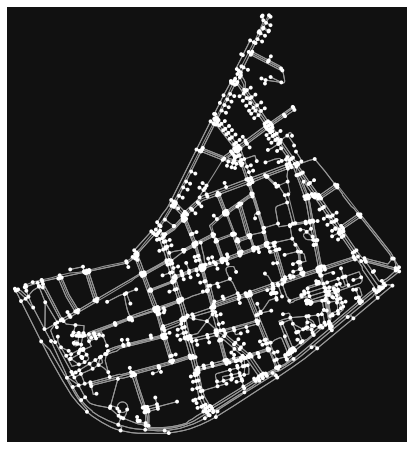

In [34]:
place_name = "Kazimierz, Krakow, Poland"
graph = ox.graph_from_place(place_name)
fig, ax = ox.plot_graph(graph)

In [37]:
G = graph
df = pd.DataFrame(columns=['node_address', 'latitude', 'longitude', 'h3_address'])
df.node_address = list(G.nodes)
df.latitude = df.apply(lambda row: G.nodes[row.node_address]['y'], axis=1)
df.longitude = df.apply(lambda row: G.nodes[row.node_address]['x'], axis=1)
zoning_level = 9
df.h3_address = df.apply(lambda row: h3.geo_to_h3(row.latitude, row.longitude, zoning_level), axis=1)

df

,node_address,latitude,longitude,h3_address
0,31349993,50.050822,19.940702,891e2e6b3a3ffff
1,31349996,50.051659,19.941806,891e2e6b3a3ffff
2,31349999,50.050194,19.942645,891e2e6b3a3ffff
3,31350002,50.047284,19.940735,891e2e6b3abffff
4,32122170,50.051206,19.943664,891e2e6b3a3ffff
...,...,...,...,...
1354,10582459207,50.051044,19.947561,891e2e6b3a7ffff
1355,10585992180,50.050629,19.944367,891e2e6b3a7ffff
1356,10585992181,50.050668,19.944549,891e2e6b3a7ffff
1357,10585992182,50.050823,19.945228,891e2e6b3a7ffff


In [38]:
hexagons = df.h3_address.unique()
# print(hexagons)
visualize_hexagons(hexagons, color="blue", w=1, folium_map=None)

In [39]:
df1 = pd.DataFrame(columns=['hex_address', 'number_of_nodes'])
df1.hex_address = df.h3_address.unique()
df1.number_of_nodes = df1.apply(lambda row: df.h3_address.value_counts()[row.hex_address], axis=1)

df1

,hex_address,number_of_nodes
0,891e2e6b3a3ffff,155
1,891e2e6b3abffff,117
2,891e2e6b3a7ffff,169
3,891e2e6b3b7ffff,129
4,891e2e686d3ffff,136
5,891e2e6b3afffff,180
6,891e2e6b17bffff,127
7,891e2e6b337ffff,28
8,891e2e6b3bbffff,35
9,891e2e686dbffff,120


In [42]:
df1.number_of_nodes.max()

180

In [46]:
center_x = pd.DataFrame((G.nodes(data='x')))[1].mean()
center_y = pd.DataFrame((G.nodes(data='y')))[1].mean()
centeral_node = get_nearest_node(G, (center_y, center_x))

h3_visualization(df1, 'hex_address', 'number_of_nodes')

C:\Users\farno\anaconda3\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


In [ ]:
1. Choose a place an import its graph
2. sample 10 nodes from the graph and plot them (on your graph)
3. apply zonning on your graph (make a dataframe with 
   columns=['node_address', 'latitude', 'longitude', 'h3_address'])
4. add distance from center column to your graph and
   visualize its impact on your zonning